In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Loan_Default.csv"  # Update with the correct path if necessary
df = pd.read_csv(file_path)

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                         

In [2]:
from scipy.stats import zscore
# Descriptive statistics
print('Descriptive statistics:')
print(df.describe(include='all'))

# Data info
print('Data info:')
print(df.info())


Descriptive statistics:
                   ID      year loan_limit  Gender approv_in_adv loan_type  \
count   148670.000000  148670.0     145326  148670        147762    148670   
unique            NaN       NaN          2       4             2         3   
top               NaN       NaN         cf    Male         nopre     type1   
freq              NaN       NaN     135348   42346        124621    113173   
mean     99224.500000    2019.0        NaN     NaN           NaN       NaN   
std      42917.476598       0.0        NaN     NaN           NaN       NaN   
min      24890.000000    2019.0        NaN     NaN           NaN       NaN   
25%      62057.250000    2019.0        NaN     NaN           NaN       NaN   
50%      99224.500000    2019.0        NaN     NaN           NaN       NaN   
75%     136391.750000    2019.0        NaN     NaN           NaN       NaN   
max     173559.000000    2019.0        NaN     NaN           NaN       NaN   

       loan_purpose Credit_Worthiness o

# Descriptive Statistics Analysis

1. **General Overview**:
   - The dataset contains **148,670 entries** and **34 columns**, mixing numerical and categorical data.

2. **Key Columns**:
   - **ID**: Unique identifier with no missing values.
   - **year**: All entries are from 2019.
   - **loan_limit**: 145,326 non-null entries; likely categorical with missing values.
   - **Gender**: Predominantly "Male" (42,346 occurrences), indicating potential gender bias.
   - **approv_in_adv**: 147,762 non-null entries; common value is "nopre."
   - **loan_type**: Three types, with "type1" being the most frequent (113,173 occurrences).
   - **Credit_Worthiness**: Mostly "l1" (142,344 occurrences), suggesting most applicants are creditworthy.
   - **rate_of_interest, Interest_rate_spread, Upfront_charges**: Significant missing values; need attention.
   - **property_value**: 133,572 non-null entries; critical for analysis.
   - **income**: 139,520 non-null entries; important for assessing financial situations.
   - **Credit_Score**: Ranges from 500 to 900, with a mean of approximately 699.79.
   - **Status**: About 24.6% of loans are defaults (mean of 0.246).

# Data Info Analysis

1. **Data Types**:
   - **8 float64**: Continuous numerical data (e.g., interest rates).
   - **5 int64**: Integer values (e.g., ID, year).
   - **21 object**: Categorical variables (e.g., Gender, loan type).

2. **Non-Null Counts**:
   - Several columns have missing values, particularly `loan_limit`, `property_value`, and `income`, which need addressing.

3. **Memory Usage**:
   - The dataset uses approximately **38.6 MB** of memory, manageable for analysis.


In [3]:
# Impute missing values (example: using mode for categorical and mean for numerical)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0])

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean())

print("Missing values handled.")

Missing values handled.


# Handling Missing Values

In this step, we addressed missing values in the dataset using the following methods:

1. **Categorical Columns**: 
   - For columns with categorical data (e.g., `Gender`, `approv_in_adv`, `loan_purpose`), missing values were filled with the mode (the most frequently occurring value). This helps maintain the distribution of categories in the dataset.

2. **Numerical Columns**: 
   - For columns with numerical data (e.g., `rate_of_interest`, `income`, `property_value`), missing values were filled with the mean (average value). This approach helps to minimize the impact of missing data on statistical analyses.

The imputation process ensures that the dataset is complete and ready for further analysis or modeling.

In [4]:
# Function to remove outliers using the Interquartile Range (IQR) method
def handle_outliers_fill_zero(df, columns):
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with 0
            df.loc[df[col] < lower_bound, col] = 0
            df.loc[df[col] > upper_bound, col] = 0
    return df

# Apply outlier handling for selected numerical columns
numerical_columns = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']
df = handle_outliers_fill_zero(df, numerical_columns)

print("Outliers handled and filled with 0.")

Outliers handled and filled with 0.


In [ ]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = "Cleaned_Loan_Default.csv"  # Specify the path for the cleaned file
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {C:\Users\hp\JNfiles}.")

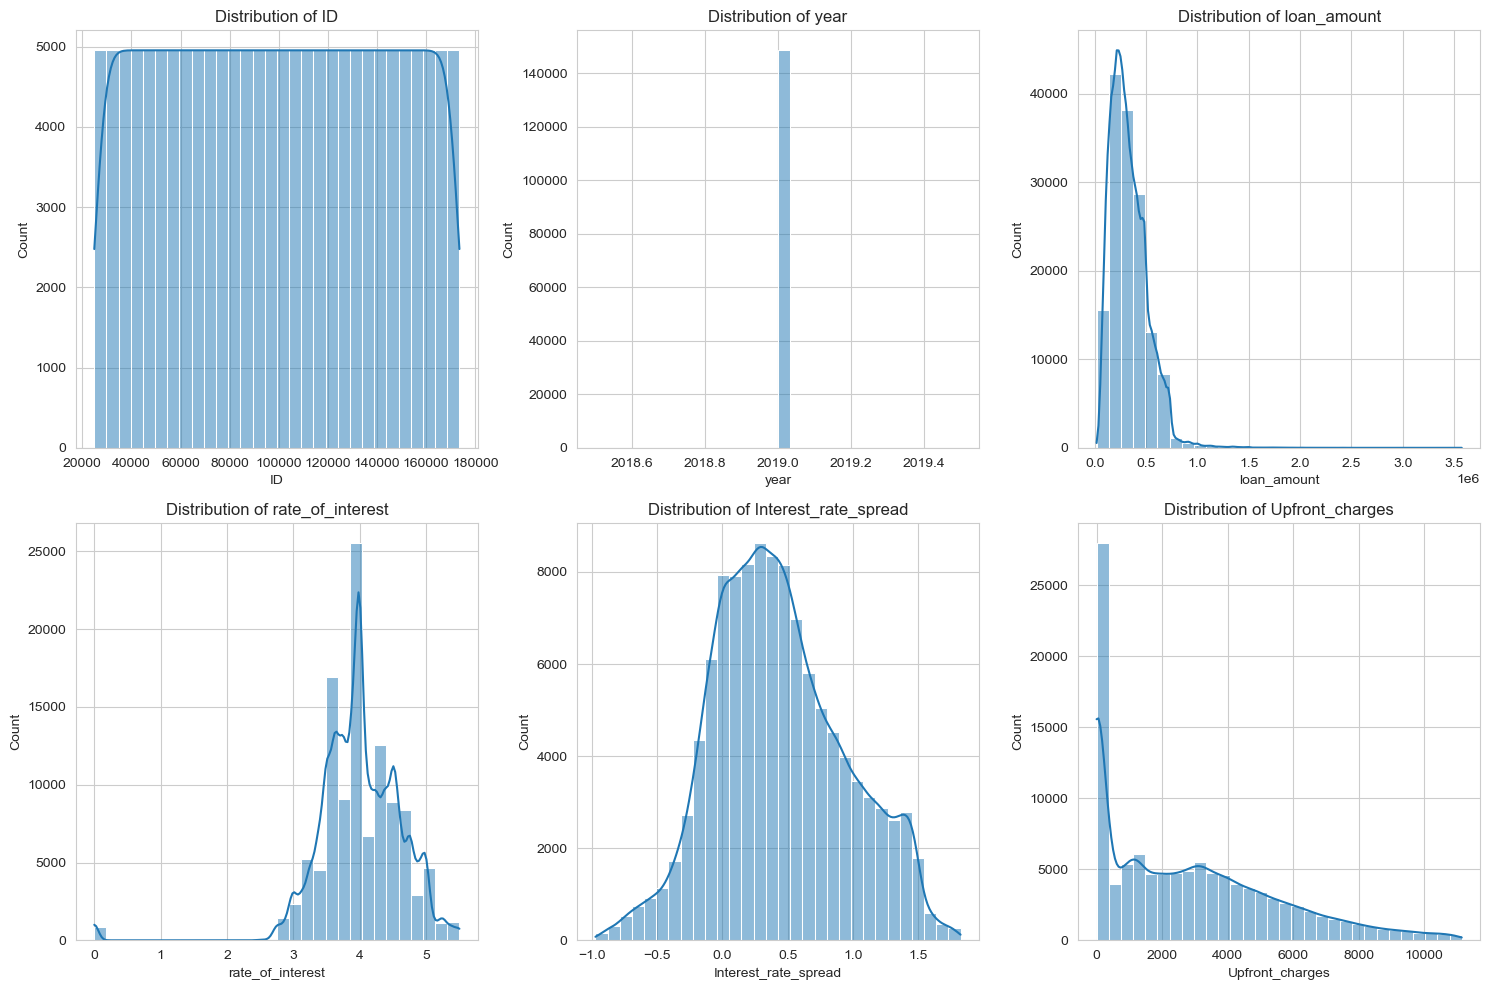

In [5]:
# Set style for Seaborn
sns.set_style("whitegrid")

# --- HISTOGRAMS ---
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Reduced to 6 histograms
axes = axes.flatten()

for i, col in enumerate(num_cols[:6]):  # Limiting to 6 features
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Distribution Analysis of Loan Data

## Overview
This section provides visual representations of the distribution of key variables in the loan dataset.

### 1. Distribution of ID
- The distribution shows a relatively uniform count across the IDs.
- This suggests that the IDs are evenly represented in the dataset.

### 2. Distribution of Year
- The majority of entries fall into the year 2019.
- There is a noticeable absence of data for other years, indicating a potential focus or limitation of the dataset.

### 3. Distribution of Loan Amount
- The distribution is right-skewed, indicating that most loans are of lower amounts.
- A few entries represent significantly higher loan amounts, contributing to the skewness.

## 4. Distribution of `rate_of_interest`
- The histogram shows the count of occurrences for different **rates of interest**.
- A noticeable peak occurs around the lower rates, specifically between 0 and 5.

## 5. Distribution of `Interest_rate_spread`
- This graph depicts the distribution of the **interest rate spread**.
- The distribution appears to be slightly skewed to the right with a peak near 0.

## 6. Distribution of `Upfront_charges`
- This histogram illustrates the counts of **upfront charges**.
- Most values appear to be concentrated at lower ranges, with a long tail extending towards higher values.

## Conclusion
Understanding these distributions is crucial for subsequent analysis and modeling, as it helps identify trends, potential outliers, and areas for further investigation.

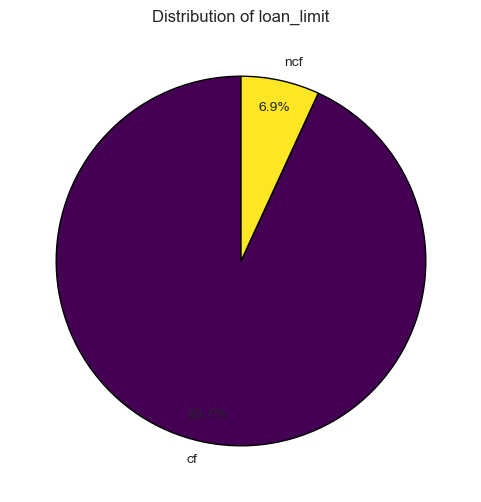

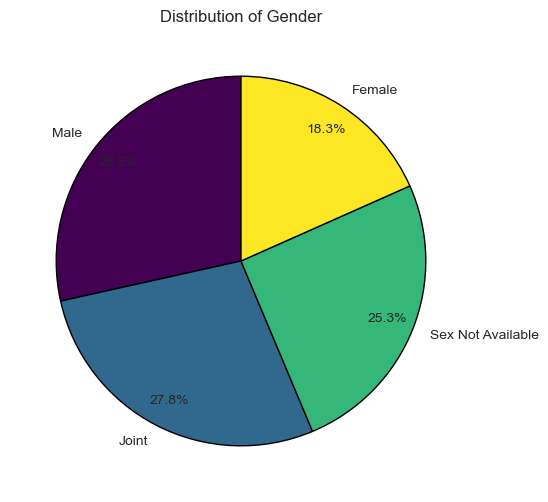

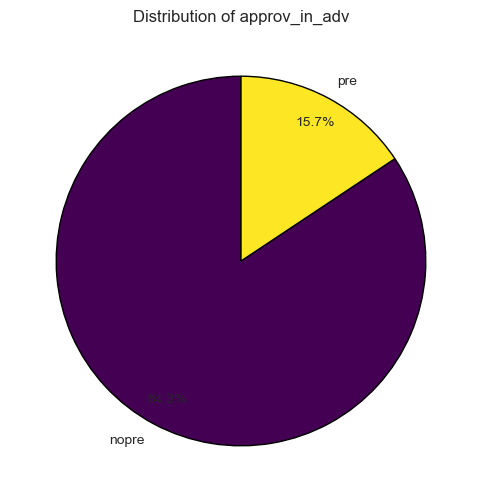

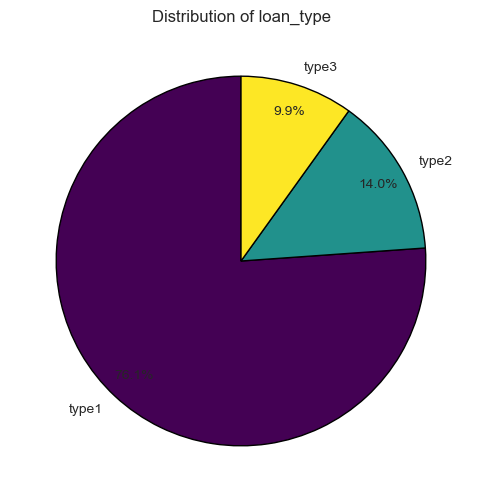

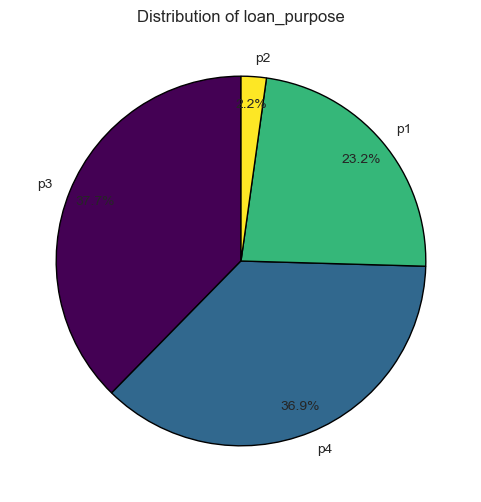

In [6]:
# --- PIE CHARTS ---
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols[:5]:  # Limiting to 5 pie charts
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis', startangle=90, pctdistance=0.85, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.show()

## Distribution of Loan Purpose

**Categories:**
- **p1:** 23.2%
- **p2:** 12.2%
- **p3:** 37.7%
- **p4:** 36.9%

**Insights:**
- The largest segment represents category **p3**, indicating it might be the most common loan purpose.
- Category **p2** has the smallest share of **12.2%**.

---

## Distribution of Loan Type

**Categories:**
- **Type1:** 76.1%
- **Type2:** 14.0%
- **Type3:** 9.9%

**Insights:**
- **Type1** dominates the loan types, suggesting it is the preferred choice among borrowers.
- **Type3** has the least representation, indicating lower interest or availability.

---

## Distribution of Approval in Advance

**Categories:**
- **Pre:** 15.7%
- **No Pre:** 84.3%

**Insights:**
- A significant majority (**84.3%**) of loans are **not approved in advance**, which may signal a more reactive lending process.

---

## Distribution of Gender

**Categories:**
- **Male:** 30.5%
- **Female:** 18.3%
- **Joint:** 27.8%
- **Sex Not Available:** 25.3%

**Insights:**
- **Male borrowers** make up the largest share, but there is a significant portion of **joint applications**.
- The **"Sex Not Available"** category indicates data collection or reporting issues.

---

## Distribution of Loan Limit

**Categories:**
- **Cf:** 93.1%
- **Ncf:** 6.9%

**Insights:**
- The overwhelmingly high percentage of **"Cf"** indicates that most loans fall within this category.
- The **"Ncf"** category remains considerably low, possibly suggesting **stricter lending criteria**.

---

## Overall Insights
- The data indicates a **strong preference** for certain **loan purposes and types** over others.
- There are **noteworthy demographics** in gender distribution and a **clear trend** in how loans are approved.
- The **loan limit distribution** suggests limitations or criteria affecting the types of loans available to borrowers.
- This analysis reveals **trends and potential areas for further investigation**, such as understanding why certain categories perform the way they do.


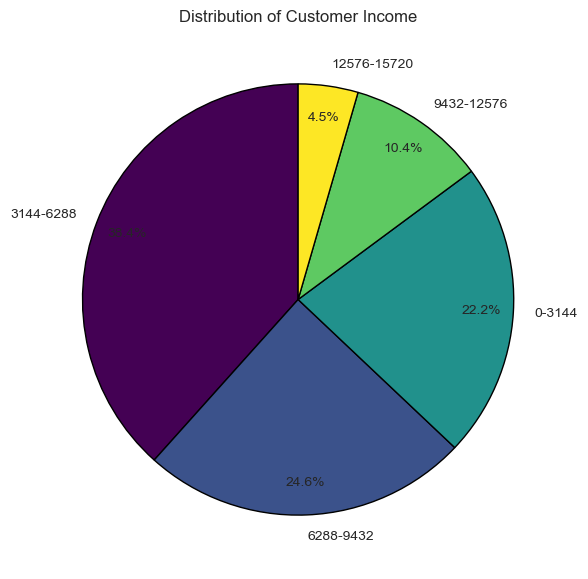

In [7]:
# --- PIE CHART FOR CUSTOMER INCOME ---
def plot_pie_chart(column, title):
    if column in df.columns:
        bins = np.linspace(df[column].min(), df[column].max(), 6)  # Create 5 bins
        labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
        df[column+'_bin'] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)
        
        plt.figure(figsize=(7, 7))
        df[column+'_bin'].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis', startangle=90, pctdistance=0.85, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
        plt.title(title)
        plt.ylabel('')
        plt.show()

if 'income' in df.columns:
    plot_pie_chart('income', 'Distribution of Customer Income')

## Insights on Customer Income Distribution

### Income Ranges and Percentages:
- **0 - 3,144:** 22.2%
- **3,144 - 6,288:** 38.4%
- **6,288 - 9,432:** 24.6%
- **9,432 - 12,576:** 10.4%
- **12,576 - 15,720:** 4.5%

### Observations:
- The largest segment of customers falls within the **3,144 - 6,288** income range, accounting for **38.4%**, indicating a significant portion of the customer base has relatively low-middle income levels.
- The **0 - 3,144** range also represents a notable portion of **22.2%**, suggesting a substantial number of customers are at the lower income threshold.
- As income increases, the proportion of customers decreases sharply, with only **10.4%** in the **9,432 - 12,576** range and a mere **4.5%** in the top bracket (**12,576 - 15,720**).

### Market Implications:
- The concentration of customers in the **lower to middle income brackets** may influence **pricing strategies and product offerings**.
- There could be opportunities for **targeted marketing efforts** aimed at attracting **higher-income customers**, as these groups are currently underrepresented in the customer base.

---

## Overall Insights
- The data indicates a **strong preference** for certain **loan purposes and types** over others.
- There are **noteworthy demographics** in gender distribution and a **clear trend** in how loans are approved.
- The **loan limit distribution** suggests limitations or criteria affecting the types of loans available to borrowers.
- This analysis reveals **trends and potential areas for further investigation**, such as understanding why certain categories perform the way they do.


C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


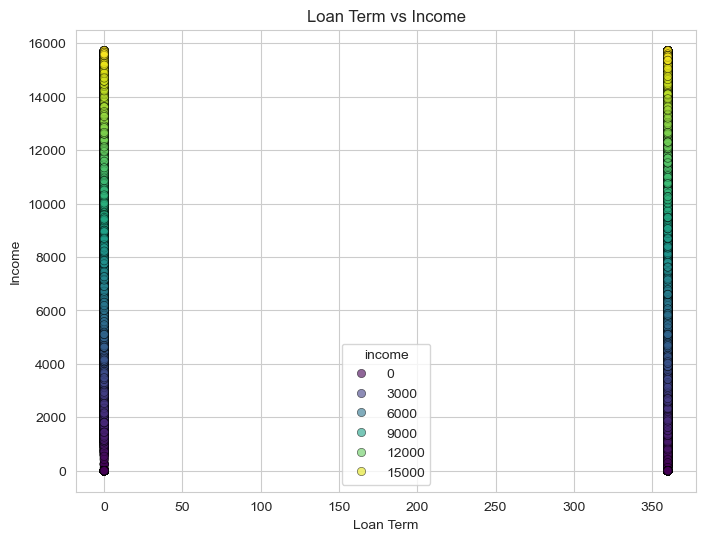

In [8]:
# --- SCATTER PLOTS WITH DISTINCT DOTS ---
if 'customer_age' in df.columns and 'rate_of_interest' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='customer_age', y='rate_of_interest', hue='rate_of_interest', palette='viridis', edgecolor='black', alpha=0.6)
    plt.title("Customer Age vs Loan Interest Rate")
    plt.xlabel("Customer Age")
    plt.ylabel("Loan Interest Rate")
    plt.show()

if 'income' in df.columns and 'term' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='term', y='income', hue='income', palette='viridis', edgecolor='black', alpha=0.6)
    plt.title("Loan Term vs Income")
    plt.xlabel("Loan Term")
    plt.ylabel("Income")
    plt.show()

# Loan Term vs Income

The graph represents the relationship between loan term and income using a scatter plot. Below are the key features of the graph:

- **Axes**:
  - **X-Axis**: Loan Term
  - **Y-Axis**: Income

- **Graph Type**: 
  - Scatter plot displaying points for each combination of loan term and income.

- **Data Representation**:
  - Points are colored based on income levels, ranging from low to high:
    - **0**
    - **3000**
    - **6000**
    - **9000**
    - **12000**
    - **15000**
  
- **Color Gradient**: 
  - The color gradient transitions through various shades indicating differing income levels, with darker colors representing lower incomes and lighter colors indicating higher incomes.

- **Insights**: 
  - Limited spread in income across different loan terms, suggesting potential clustering of income levels with specific loan terms.


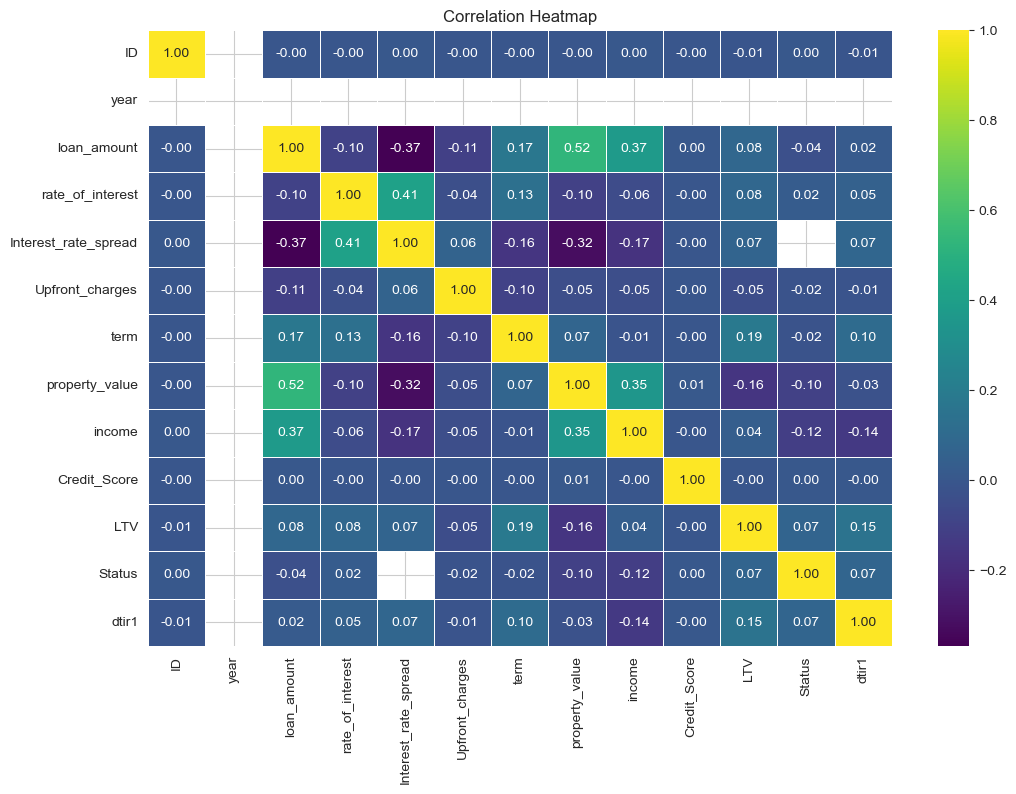

In [9]:
# --- CORRELATION HEAT MAP ---
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation Heatmap Analysis

The correlation heatmap provides insights into the relationships between various numerical variables in the dataset. Below is a structured analysis of key findings:

### 1. Strong Positive Correlations
- **Loan Amount and Property Value (0.52):**
  - Indicates that as the loan amount increases, the property value tends to increase as well.
- **Income and Property Value (0.35):**
  - Suggests that higher income is associated with higher property values.

### 2. Moderate Positive Correlations
- **Loan Amount and Income (0.37):**
  - Suggests a positive relationship, indicating that higher incomes can lead to larger loan amounts.

### 3. Negative Correlations
- **Interest Rate Spread and Loan Amount (−0.37):**
  - Indicates that higher interest rates are associated with a reduced loan amount requests.
- **Property Value and Upfront Charges (−0.32):**
  - Suggests that higher property values might be associated with lower upfront charges.

### 4. Other Relationships
- **Term and Interest Rate (0.07):**
  - A weak positive correlation indicating a slight tendency for longer loan terms to be associated with higher interest rates.
- **Credit Score and LTV (0.07):**
  - Suggests that a higher credit score is slightly associated with a lower loan-to-value ratio.

### 5. Weak to No Correlation
- **ID (Mainly Zero Correlations):**
  - The variable ID is not correlated with other features, which is expected since it's typically a unique identifier.
- **Status and Various Features:**
  - Negative or near-zero correlations, indicating that the loan status does not strongly relate to the other financial variables.

### Conclusion
The heatmap indicates critical relationships between loan characteristics, property values, incomes, and interest rates. Significant positive correlations suggest that as one variable increases, others do as well, while negative correlations indicate inverse relationships that could be useful for understanding loan dynamics.
